<a href="https://colab.research.google.com/github/FrankArcosAnselmo/mI_lab01_Fa/blob/develop/LAB08_ARCOS_FRANK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 08
# NOMBRE: ARCOS ANSELMO FRANK

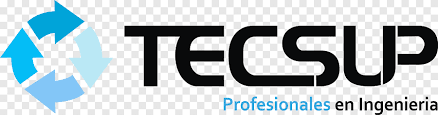

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


## Lea la base de datos, realice imputaciones, tratamiento de outliers transformaciones de datos
## y desbalance de clases en caso sea necesario. Además, separe la variable de clasificación del
## resto de variables para luego obtener los datos de entrenamiento y prueba, tomando de este
## último el 25% de datos

In [10]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
columnas = ["ID", "Clump_Thickness", "Uniformity_Cell_Size", "Uniformity_Cell_Shape",
            "Marginal_Adhesion", "Single_Epithelial_Cell_Size", "Bare_Nuclei",
            "Bland_Chromatin", "Normal_Nucleoli", "Mitoses", "Class"]
df = pd.read_csv(url, header=None, names=columnas)


In [7]:
# Reemplazar valores faltantes "?" por NaN y convertir a números
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [8]:
# Imputación de valores faltantes con la mediana
imputer = SimpleImputer(strategy='median')
df_imputado = df.copy()
df_imputado.iloc[:, 1:-1] = imputer.fit_transform(df.iloc[:, 1:-1])

In [9]:
# Tratamiento de outliers con IQR (opcional, aquí solo un ejemplo simple)
Q1 = df_imputado.iloc[:, 1:-1].quantile(0.25)
Q3 = df_imputado.iloc[:, 1:-1].quantile(0.75)
IQR = Q3 - Q1
df_clean = df_imputado[~((df_imputado.iloc[:, 1:-1] < (Q1 - 1.5 * IQR)) | (df_imputado.iloc[:, 1:-1] > (Q3 + 1.5 * IQR))).any(axis=1)]

# División X (features) e y (clase)
X = df_clean.drop(["ID", "Class"], axis=1)
y = df_clean["Class"]  # 2 = benign, 4 = malignant

# Balance de clases
print("Distribución de clases:\n", y.value_counts())

# División de datos: 75% train / 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Distribución de clases:
 Class
2    439
4     65
Name: count, dtype: int64


#Genere el modelo de árbol de decisión para clasificación y la profundidad adecuada para este. Además, calcule las métricas de clasificación e interprete sus resultados más importantes

In [14]:
# Árbol de decisión
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

# Métricas del árbol
print("=== Árbol de Decisión ===")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


=== Árbol de Decisión ===
[[106   4]
 [  2  14]]
              precision    recall  f1-score   support

           2       0.98      0.96      0.97       110
           4       0.78      0.88      0.82        16

    accuracy                           0.95       126
   macro avg       0.88      0.92      0.90       126
weighted avg       0.96      0.95      0.95       126



Genere el modelo de bosques aleatorios para clasificación. Además, calcule las métricas de
clasificación y compárelas con las del árbol de clasificación. ¿Hubo mejoras o no?

In [17]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Métricas del Random Forest
print("=== Bosques Aleatorios ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Bosques Aleatorios ===
[[106   4]
 [  2  14]]
              precision    recall  f1-score   support

           2       0.98      0.96      0.97       110
           4       0.78      0.88      0.82        16

    accuracy                           0.95       126
   macro avg       0.88      0.92      0.90       126
weighted avg       0.96      0.95      0.95       126



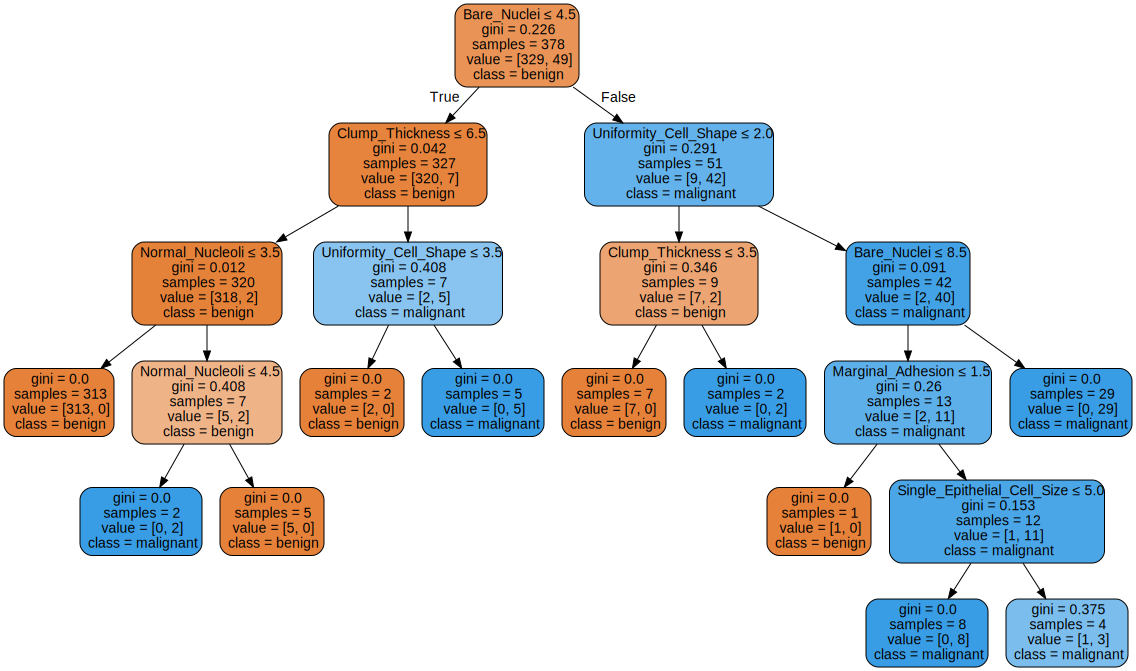

In [18]:
# prompt: crear un arbol de deciosn con los datos hechos

# Ya se ha creado e impreso el modelo de árbol de decisión en el código anterior.
# Para visualizar el árbol, puedes usar la siguiente función (requiere graphviz):

from sklearn.tree import export_graphviz
import graphviz

# Exportar el árbol a formato DOT
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['benign', 'malignant'], #nombres de las clases
                           filled=True, rounded=True,
                           special_characters=True)

# Crear el gráfico
graph = graphviz.Source(dot_data)
graph


In [19]:
from sklearn.metrics import accuracy_score

tree_accuracy = accuracy_score(y_test, y_pred_tree)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Decision Tree Accuracy: {tree_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")

if rf_accuracy > tree_accuracy:
  print("Random Forest shows improvement over the Decision Tree.")
elif rf_accuracy < tree_accuracy:
  print("Decision Tree shows better accuracy than Random Forest.")
else:
  print("Both models have the same accuracy.")


Decision Tree Accuracy: 0.9523809523809523
Random Forest Accuracy: 0.9523809523809523
Both models have the same accuracy.


In [20]:

# Decision Tree
for depth in range(1,11):
  tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
  tree_clf.fit(X_train, y_train)
  y_pred_tree = tree_clf.predict(X_test)

  # Metrics of the tree
  print(f"=== Árbol de Decisión con profundidad {depth} ===")
  print(classification_report(y_test, y_pred_tree))
  print(f"Accuracy for depth {depth}: {accuracy_score(y_test, y_pred_tree)}")

# Interpretation of the results
# - Precision: Out of all the instances predicted as positive (malignant), how many were actually positive?
# - Recall (Sensitivity): Out of all the actual positive instances, how many were correctly predicted?
# - F1-score: Harmonic mean of precision and recall. Provides a balanced measure of the model's performance.
# - Support: Number of actual occurrences of the class in the specified dataset.

# Choose the depth with the best balance of precision, recall and f1-score based on the results.
# The confusion matrix helps visualize correct and incorrect predictions for each class.



=== Árbol de Decisión con profundidad 1 ===
              precision    recall  f1-score   support

           2       0.97      0.97      0.97       110
           4       0.81      0.81      0.81        16

    accuracy                           0.95       126
   macro avg       0.89      0.89      0.89       126
weighted avg       0.95      0.95      0.95       126

Accuracy for depth 1: 0.9523809523809523
=== Árbol de Decisión con profundidad 2 ===
              precision    recall  f1-score   support

           2       0.99      0.95      0.97       110
           4       0.75      0.94      0.83        16

    accuracy                           0.95       126
   macro avg       0.87      0.95      0.90       126
weighted avg       0.96      0.95      0.95       126

Accuracy for depth 2: 0.9523809523809523
=== Árbol de Decisión con profundidad 3 ===
              precision    recall  f1-score   support

           2       0.98      0.96      0.97       110
           4       0.78

In [23]:
# prompt: saca el resultado para accuracy, precision, f score , recall

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test and y_pred_tree are already defined from the previous code

#Decision Tree Metrics
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_precision = precision_score(y_test, y_pred_tree, pos_label=4) # Assuming 4 represents the positive class (malignant)
tree_recall = recall_score(y_test, y_pred_tree, pos_label=4)
tree_f1 = f1_score(y_test, y_pred_tree, pos_label=4)

print("Decision Tree Metrics:")
print(f"Accuracy: {tree_accuracy}")
print(f"Precision: {tree_precision}")
print(f"Recall: {tree_recall}")
print(f"F1-score: {tree_f1}")

# Random Forest Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, pos_label=4)
rf_recall = recall_score(y_test, y_pred_rf, pos_label=4)
rf_f1 = f1_score(y_test, y_pred_rf, pos_label=4)

print("\nRandom Forest Metrics:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-score: {rf_f1}")


Decision Tree Metrics:
Accuracy: 0.9523809523809523
Precision: 0.7777777777777778
Recall: 0.875
F1-score: 0.8235294117647058

Random Forest Metrics:
Accuracy: 0.9523809523809523
Precision: 0.7777777777777778
Recall: 0.875
F1-score: 0.8235294117647058


Métricas de Regresión Logística:
              precision    recall  f1-score   support

           2       0.98      0.96      0.97       110
           4       0.78      0.88      0.82        16

    accuracy                           0.95       126
   macro avg       0.88      0.92      0.90       126
weighted avg       0.96      0.95      0.95       126

Matriz de Confusión:
 [[106   4]
 [  2  14]]

Logistic Regression Metrics:
Accuracy: 0.9523809523809523
Precision: 0.7777777777777778
Recall: 0.875
F1-score: 0.8235294117647058


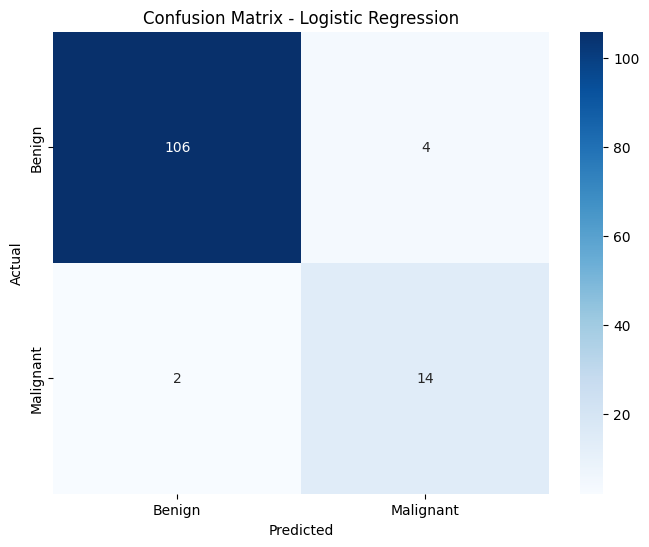

In [28]:
# prompt: #Métricas
# print("Métricas de Regresión Logística:")
# print(classification_report(y_test, y_pred_lr))
# print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
# mejoralo a losd aots

from sklearn.linear_model import LogisticRegression

# ... (Your existing code) ...

# Regresión Logística
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)

# Métricas
print("Métricas de Regresión Logística:")
print(classification_report(y_test, y_pred_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))

# Calculate additional metrics for Logistic Regression
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, pos_label=4)
lr_recall = recall_score(y_test, y_pred_lr, pos_label=4)
lr_f1 = f1_score(y_test, y_pred_lr, pos_label=4)

print("\nLogistic Regression Metrics:")
print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1-score: {lr_f1}")


# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


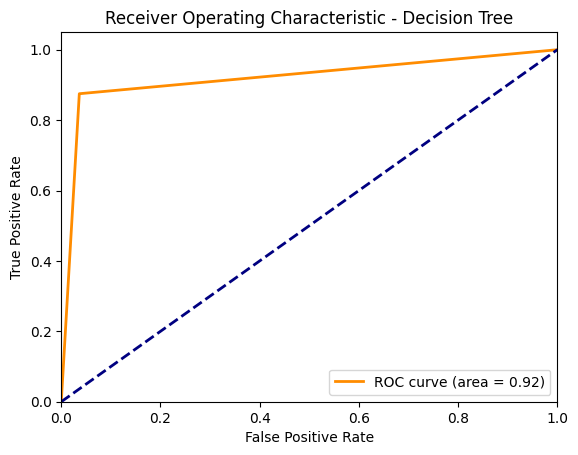

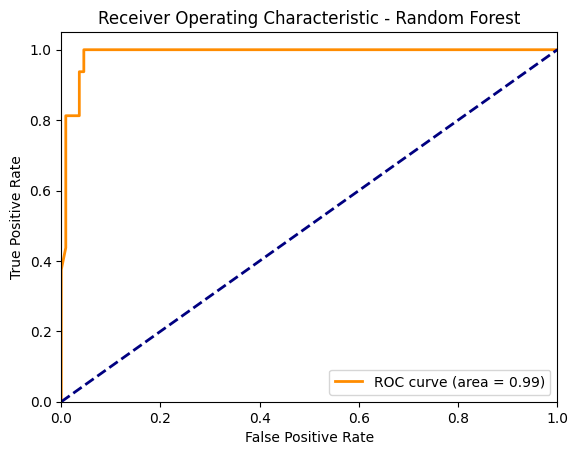

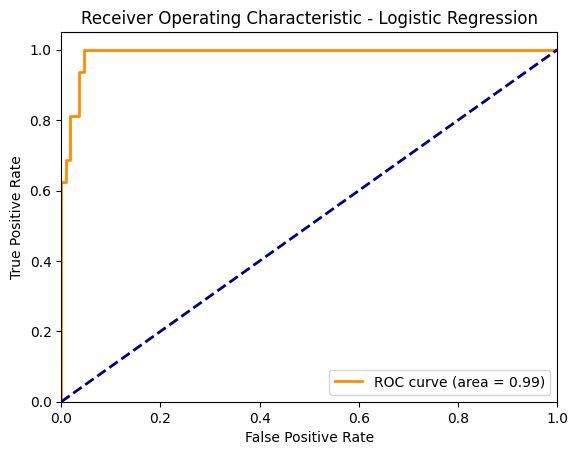

Decision Tree AUC: 0.9193181818181818
Random Forest AUC: 0.9889204545454546
Logistic Regression AUC: 0.9897727272727274


In [29]:
# prompt: sacale el auc y roc

from sklearn.metrics import roc_curve, auc

# ... (Your existing code) ...

# Calculate ROC curve and AUC for Decision Tree
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, tree_clf.predict_proba(X_test)[:, 1], pos_label=4)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Plot ROC curve for Decision Tree
plt.figure()
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc="lower right")
plt.show()

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1], pos_label=4)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()


# Calculate ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_clf.predict_proba(X_test)[:, 1], pos_label=4)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve for Logistic Regression
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

print(f"Decision Tree AUC: {roc_auc_tree}")
print(f"Random Forest AUC: {roc_auc_rf}")
print(f"Logistic Regression AUC: {roc_auc_lr}")
